# surpriseライブラリを使用した予測

### 1. Cross validationによる手法の評価

In [1]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Define a Reader object
# The Reader object helps in parsing the file or dataframe
reader = Reader(rating_scale=(1, 10))

# Load the dataset
train_df = pd.read_csv('/workspace/input/atmaCup15_dataset/train.csv')

train_data = Dataset.load_from_df(train_df[['user_id', 'anime_id', 'score']], reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
_ = cross_validate(algo, train_data, measures=['RMSE',], cv=10, verbose=True)

Evaluating RMSE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1874  1.2026  1.1881  1.1982  1.1955  1.1968  1.1965  1.2124  1.2205  1.1818  1.1980  0.0110  
Fit time          0.75    0.80    0.78    0.80    0.76    0.76    0.77    0.82    0.81    0.80    0.79    0.02    
Test time         0.11    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.11    0.06    0.03    


### 2. 全trainデータで学習し直す

In [2]:
# Create the dataset to be used for building the filter
train_data = Dataset.load_from_df(train_df[['user_id', 'anime_id', 'score']], reader)

# Retrieve the trainset.
train_data = train_data.build_full_trainset()

# Build an algorithm, and train it.
algo = SVD()
_ = algo.fit(train_data)

### 3. testデータに対して予測

In [3]:
# Load the test dataset
test_df = pd.read_csv('/workspace/input/atmaCup15_dataset/test.csv')
test_df['score'] = 0

# Convert the test dataset to the surprise format
test_set = Dataset.load_from_df(test_df, reader).build_full_trainset().build_testset()

# Predict ratings for the testset
predictions = algo.test(test_set)

submission = pd.read_csv('/workspace/input/atmaCup15_dataset/sample_submission.csv')

# Extract the predicted ratings and add them to the test dataframe
submission['score'] = [pred.est for pred in predictions]

submission.to_csv('submission.csv', index=False)

この例ではanime.csvの内容は全く使用せず、純粋なユーザーの評価値のみを使用しています。  
それらのデータと組み合わせることでさらに精度の向上が期待できますので、試してみてください。

<Axes: >

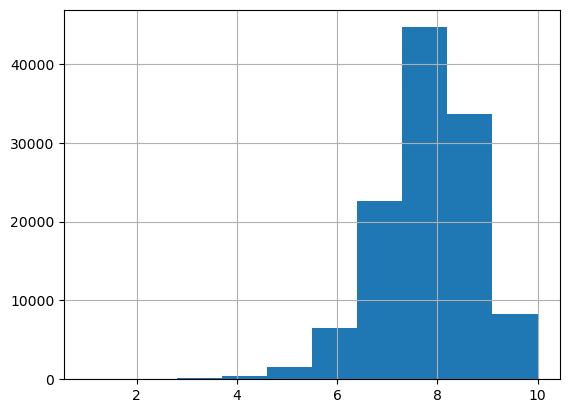

In [4]:
submission["score"].hist()